<a href="https://colab.research.google.com/github/LubangaD/tradingstrategy/blob/main/UBER_of_169240_D_Lubanga_DSA8202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME:**  Lubanga Derrick <br>
**REG NO:** 169240 <br>
**COURSE:** Time Series Analysis & Forecasting<br>
**COURSE CODE** DSA 8202

<h2>This a project where I will be creating a trading strategies using UBER  stocks historical data obtained from Yahoo finance<h2>

In [148]:
!pip install bt

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

--2024-02-23 09:32:18--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-02-23 09:32:18--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://pilotfiber.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-02-23 09:32:18--  http://pilotfiber.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving pilotfibe

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import bt
import yfinance as yf
import plotly.graph_objects as go

In [ ]:
start_date = '2021-02-10'
end_date = '2024-02-10'
ticker_symbol = 'UBER'

# Download historical price data
uber_data = yf.download(ticker_symbol, start=start_date, end=end_date)
uber_data_bt= bt.get(ticker_symbol, start=start_date, end=end_date)

In [ ]:
uber_data_bt.head()

In [ ]:
uber_data.head()

In [ ]:
#Lets plot the Closing price
plt.plot(uber_data['Close'], color='red')
plt.title("Daily close price")
plt.show()


**Candlesticks for the stocks**

In [ ]:
# Define the candlestick
candlestick = go.Candlestick(x = uber_data.index,open = uber_data['Open'],
                             high = uber_data['High'],
                             low = uber_data['Low'],
                             close = uber_data['Close'])
# Create a plot
fig = go.Figure(data=[candlestick])
# Show the plot
fig.show()


**Different types of traders**


Day Trader:holds positions throughout the day but usually not overnight<br>
Swing Trader:holds positions from a few days to several weeks <br>
Position Trader:holds positions from a few months to several years


Let us have an overview of the data

In [ ]:
uber_daily = uber_data.resample('D').mean()
print(uber_daily)

In [ ]:
uber_weekly = uber_data.resample('w').mean()
print(uber_weekly.head())

In [ ]:
#Calculate Daily returns
uber_data['daily_returns']=uber_data['Close'].pct_change()*100
print(uber_data.head())

In [ ]:
#Plot the data
plt.plot(uber_data['daily_returns'])
plt.show()

In [ ]:
#plot the histogram
uber_data['daily_returns'].hist(bins=100)
plt.show()

<h1>Technical indicators

Useful tools for constructing trading signals and building strategies.<br>

<h1>


**What are technical indicators?**<br>
Mathematical calculations based on historical market data<br>
Assume the market is efficient and the price has incorporated all public information <br>
Help traders to gain insight into past price patterns<br>


<h2>Types of indicators<h2>



# New Section



1.  **Trend indicators**: measure the direction or strength of a trend<br>
Example:Movingaverages(MA),Average Directional Movement Index(ADX)<br>
2.   **Momentum indicators**: measure the velocity of price movement Example: Relative Strength Index(RSI)<br>
3. **Volatility indicators**:measure the magnitude of price deviations Example: Bollinger Bands

**Example of a trend indicator using the SMA for a  rolling period of 50**

In [ ]:
uber_data['sma_50'] = uber_data['Close'].rolling(window=50).mean()
print(uber_data.head())

In [ ]:
#Plot the rolling average
plt.plot(uber_data['Close'],label='Close')
plt.plot(uber_data['sma_50'],label='SMA_50')
plt.legend()
plt.show()


**What are trading signals?**<br>
Triggers to long or short financial assets based on predetermined criteria<br>
Can be constructed using:


1.   One technical indicator
2.   Multiple technical indicators


A combination of market data and indicators.<br>
Commonly used in algorithmic trading.


<h3> Moving average indicators(type of trend indicator)<h3>


1.   Simple moving average Indicators
2.   Exponential Moving average


Difference between SMA and EMA <br>

*SMA*
1.  SMA moves the price.

2.  Smooths out the data to better indicate the price direction

3.  SMA assigns equals weight to all data points.

*EMA*

1.   Exponentially Weighted average<br>
2.   EMA gives more weight to the recent price movement




**1. SMA-Based signal strategy**

This trading strategy is used when trading one stock at a time or one asset when trading multiple stocks or assets their price correlations are important for proper position sizing and asset  allocation

In [ ]:
uber_data.head()

In [ ]:
#construct the signal
sma=uber_data_bt.rolling(30).mean()

In [ ]:
sma

Apply the signal to the strategy

In [ ]:
#Define  a signal based strategy
bt_strategy= bt.Strategy('AboveSMA',
                         [bt.algos.SelectWhere(uber_data_bt > sma),
                          bt.algos.WeighEqually(),
                          bt.algos.Rebalance()])

**If the prices rise above the sma a long signal is triggered to enter long positions of the asset**

Once the strategy is defined create and run a backtest to see how it performs

In [ ]:
#Create the backtest and run it
bt_backtest = bt.Backtest(bt_strategy, uber_data_bt)
bt_results = bt.run(bt_backtest)

Plot and review the backtest result

In [ ]:
bt_results.plot(title='Backtest Result')

The flat line areas indicate periods when we do not have any positions so the trading balance does not change

**2. Lets create a strategy using EMA**


However, you are wondering whether the EMA (exponential moving average) indicator is a better choice since it is more sensitive to recent price movement.

Exponentially Weighted average<br>
EMA gives more weight to the recent price movement

In [ ]:
print(uber_data.head())

**3. Trend following Strategies**

**Two types of trading strategies**<br>
**1. Trend-following**<br> Bet the price trend will continue in the
same direction Use trend indicators such as moving averages,ADX,etc to construct trading signals <br>



**MA cross over strategy** <br>
The trend is your friend.<br>
**Two EMA crossover:**<br>
Long signal: the short-term EMA crosses above the long-term EMA <br>
Short signal:the short-term EMA crosses below the long-termEMA





In [ ]:
# Calculate the indicators
EMA_short = talib.EMA(uber_data['Close'],
                       timeperiod=10).to_frame()
EMA_long = talib.EMA(uber_data['Close'],
                    timeperiod=40).to_frame()


In [ ]:
#Construct the signal
signal = EMA_long.copy()
signal[EMA_long.isnull()] = 0
# Construct the signal
signal[EMA_short > EMA_long] = 1
signal[EMA_short < EMA_long] = -1


In [ ]:
signal.tail(20)

In [ ]:
# Plot the signal, price and MAs
combined_df = bt.merge(signal, uber_data['Close'], EMA_short, EMA_long)
combined_df.columns = ['Signal', 'Price', 'EMA_short', 'EMA_long']
combined_df.plot(secondary_y=['Signal'])


In [ ]:
# Define the strategy
bt_strategy = bt.Strategy('EMA_crossover',
                          [bt.algos.WeighTarget(signal),
                           bt.algos.Rebalance()])


**Backtest the signal based strategy**

In [ ]:
# Create the backtest and run it
bt_backtest = bt.Backtest(bt_strategy, EMA_long)
bt_results1 = bt.run(bt_backtest)


In [ ]:
# Plot the backtest result
bt_results1.plot(title='Backtest result')

**2. Mean reversion strategy** the second trend following strategy.


**Mean Reversion strategy**: Bet the price trends to reverse back towards the mean Use indicators such as RSI,BollingerBands,etc,to construct tradingsignals

**RSI-based mean reversion strategy:**<br>

Measures the momentum of a trend (The speed of rising or falling prices)<br>
Shortsignal: RSI>70 Suggests the asset is likely over bought and the price may soon reverse<br>
Long signal: RSI<30 Suggests the asset is likely over sold and the price may soon rally<br><br>

**The longer the lookback window the less senstive the RSI is to price fluctuations**


In [ ]:
#Calculate the RSI
uber_rsi = talib.RSI(uber_data['Close']).to_frame()


**Construct the signal**

In [ ]:
# Create the same DataFrame structure as RSI
signal = uber_rsi.copy()
signal[uber_rsi.isnull()] = 0
# Construct the signal
signal[uber_rsi < 30] = 1
signal[uber_rsi > 70] = -1
signal[(uber_rsi <= 70) & (uber_rsi >= 30)] = 0


**Plot the signal**

In [ ]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2)
# Plot RSI with the price
ax1.set_ylabel('Price')
ax1.plot(uber_daily['Close'])
ax2.set_ylabel('RSI')
ax2.plot(uber_rsi, color='orangered')

ax1.set_title('Price and RSI')
plt.show()

In [ ]:
uber_rsi.plot()
plt.title('RSI')

In [ ]:
# Merge data into one DataFrame
combined_df = bt.merge(signal, uber_data['Close'])
combined_df.columns = ['Signal', 'Price']
# Plot the signal with price
combined_df.plot(secondary_y = ['Signal'])


In [ ]:
# Define the strategy
bt_strategy = bt.Strategy('RSI_MeanReversion',
                          [bt.algos.WeighTarget(signal),
                           bt.algos.Rebalance()])

In [ ]:
# Create the backtest and run it
bt_backtest = bt.Backtest(bt_strategy, uber_rsi)
bt_results2 = bt.run(bt_backtest)
bt_results2.plot()

**The flat points Indicate that no trading was taking place hence the balance of price remains the same**

**Strategy optimization** <br>
We need to find out which input parameter values will give us the best strategy performance based on our historical data

Which lookback period should we use for SMA that can optimize the strategy performance. We run multiple backtests on different input parameters. Also, We want the capability to assess the strategy on trading different stocks or based on different historical periods

I created a function, signal_strategy to calculate sma using price_data based on a given period. <br>
Defined a signal strategy by comparing price_data and sma, and return a bt backtest.

In [ ]:
def signal_strategy(uber_data_bt, period, name):
    # Calculate SMA
    sma = uber_data_bt.rolling(period).mean()
    # Define the signal-based Strategy
    bt_strategy = bt.Strategy(name,
                              [bt.algos.SelectWhere(uber_data_bt>sma),
                               bt.algos.WeighEqually(),
                               bt.algos.Rebalance()])
    # Return the backtest
    return bt.Backtest(bt_strategy, uber_data_bt)

Call the function signal_strategy three times, and each time set period to 20, 30, and 50 respectively and save the results.

Run all backtests sma20, sma30, sma50 (in that order), and plot the results.

In [ ]:
# Create signal strategy backtest
sma20 = signal_strategy(uber_data_bt, period=20, name='SMA20')
sma30 = signal_strategy(uber_data_bt, period=30, name='SMA30')
sma50 = signal_strategy(uber_data_bt, period=50, name='SMA50')

# Run all backtests and plot the resutls
bt_results3 = bt.run(sma20,sma30,sma50)
bt_results3.plot(title='Strategy optimization')
plt.show()

Based on the backtest results, using SMA in the strategy to trade the Uber stock is Fairly same for all the lookback periods the market moves side ways most of the time. However, using a lookback period of 30 days serves better than the rest. The fast moving average is quick to capture the trend, but also quick to react to the market noise when there is no trend.

**Perform a strategy benchmarking**

*Instead of spending energy actively trading a stock, what if we just sit back and hold the stock for a period of time. Does my active trading strategy generate better profits than a passive buy-and-hold strategy*

*Define a passive buy and hold strategy, and return a bt backtest*

In [186]:
def buy_and_hold(uber_data_bt, name):
    # Define the benchmark strategy
    bt_strategy = bt.Strategy(name,
                              [bt.algos.RunOnce(),
                               bt.algos.SelectAll(),
                               bt.algos.WeighEqually(),
                               bt.algos.Rebalance()])
    # Return the backtest
    return bt.Backtest(bt_strategy, uber_data_bt)

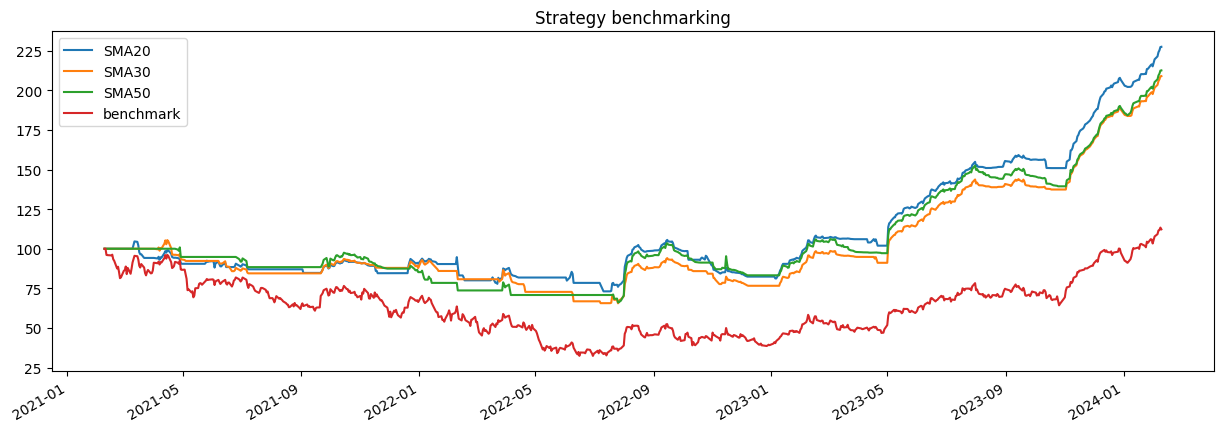

In [187]:
# Create benchmark strategy backtest
benchmark = buy_and_hold(uber_data_bt, name='benchmark')

# Run all backtests and plot the resutls
bt_result = bt.run(sma20, sma30, sma50, benchmark)
bt_result.plot(title='Strategy benchmarking')
plt.show()

*The backtest results suggest the signal-based strategy outperformed the benchmark buy-and-hold strategy (red line)*

**Strategy optimization and benchmarking for RSI trading strategy and EMA crossover trading strategy**

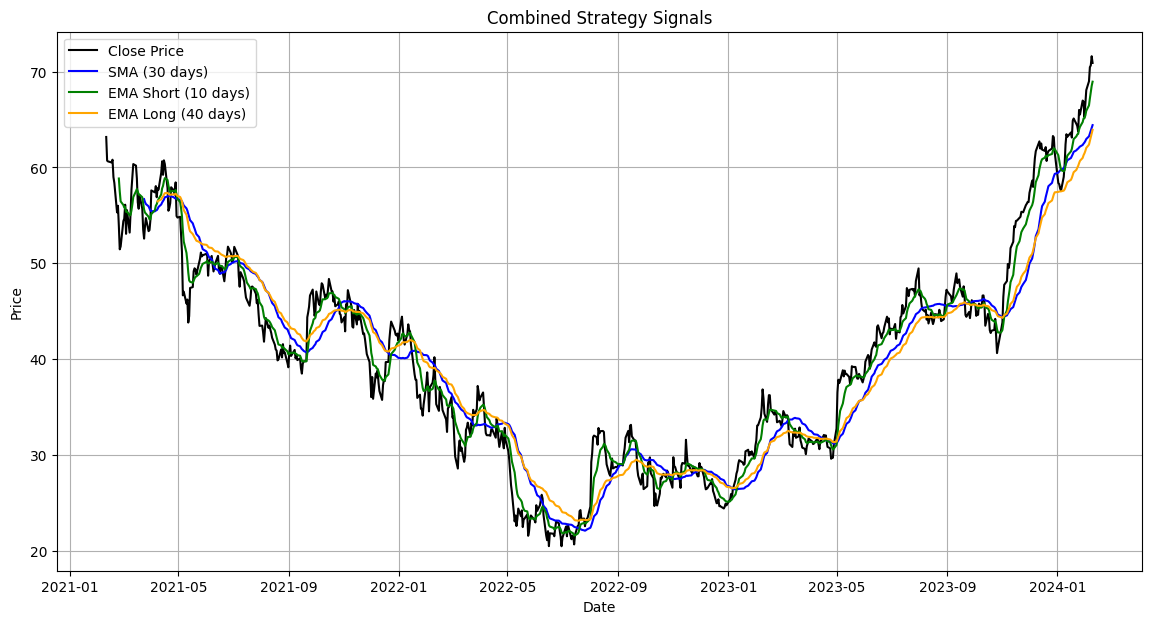

In [188]:

# Calculate SMA
sma_period = 30
uber_data['SMA'] = uber_data['Close'].rolling(sma_period).mean()

# Calculate EMA
ema_short_period = 10
ema_long_period = 40
uber_data['EMA_short'] = talib.EMA(uber_data['Close'], timeperiod=ema_short_period)
uber_data['EMA_long'] = talib.EMA(uber_data['Close'], timeperiod=ema_long_period)

# Calculate RSI
rsi_period = 14
uber_data['RSI'] = talib.RSI(uber_data['Close'], timeperiod=rsi_period)

# SMA signal
uber_data['SMA_signal'] = np.where(uber_data['Close'] > uber_data['SMA'], 1, -1)

# EMA signal
uber_data['EMA_signal'] = np.where(uber_data['EMA_short'] > uber_data['EMA_long'], 1, -1)

# RSI signal
uber_data['RSI_signal'] = np.where(uber_data['RSI'] < 30, 1, np.where(uber_data['RSI'] > 70, -1, 0))

# Combine signals
uber_data['Combined_signal'] = np.where(
    (uber_data['SMA_signal'] == 1) & (uber_data['EMA_signal'] == 1) & (uber_data['RSI_signal'] == 1), 1,
    np.where((uber_data['SMA_signal'] == -1) & (uber_data['EMA_signal'] == -1) & (uber_data['RSI_signal'] == -1), -1, 0)
)

# Plot the signals
plt.figure(figsize=(14, 7))
plt.plot(uber_data['Close'], label='Close Price', color='black')
plt.plot(uber_data['SMA'], label=f'SMA ({sma_period} days)', color='blue')
plt.plot(uber_data['EMA_short'], label=f'EMA Short ({ema_short_period} days)', color='green')
plt.plot(uber_data['EMA_long'], label=f'EMA Long ({ema_long_period} days)', color='orange')
plt.legend(loc='upper left')

# # Plot SMA signal
# plt.plot(uber_data.loc[porto_data['SMA_signal'] == 1].index,
#          uber_data['Close'][uber_data['SMA_signal'] == 1],
#          '^', markersize=10, color='g', lw=0, label='Buy Signal')
# plt.plot(uber_data.loc[uber_data['SMA_signal'] == -1].index,
#          uber_data['Close'][uber_data['SMA_signal'] == -1],
#          'v', markersize=10, color='r', lw=0, label='Sell Signal')

# # Plot EMA signal
# plt.plot(uber_data.loc[uber_data['EMA_signal'] == 1].index,
#          uber_data['Close'][uber_data['EMA_signal'] == 1],
#          'o', markersize=8, color='g', lw=0)
# plt.plot(uber_data.loc[uber_data['EMA_signal'] == -1].index,
#          uber_data['Close'][uber_data['EMA_signal'] == -1],
#          'o', markersize=8, color='r', lw=0)

# # Plot RSI signal
# plt.plot(uber_data.loc[uber_data['RSI_signal'] == 1].index,
#          uber_data['Close'][uber_data['RSI_signal'] == 1],
#          '*', markersize=12, color='g', lw=0)
# plt.plot(uber_data.loc[uber_data['RSI_signal'] == -1].index,
#          uber_data['Close'][uber_data['RSI_signal'] == -1],
#          '*', markersize=12, color='r', lw=0)

plt.title('Combined Strategy Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

<h1>Evaluation of the trading strategies

The Sortino ratio is the excess return over the risk-free rate divided by the downside deviation, and thus it measures the excess return to "bad" volatility. In other words, it doesn't penalize the volatility of positive excess returns.

*Below is backtest results for a the SMA trading strategies and we want to look at the evaluation of the strategy by checking its sortino ratios compare them to the oher sortino ratios of the trading strategies*

In [189]:
resInfo= bt_results.stats

In [190]:
print(resInfo)

                                  AboveSMA
start                  2021-02-09 00:00:00
end                    2024-02-09 00:00:00
rf                                     0.0
total_return                      1.089229
cagr                              0.278601
max_drawdown                     -0.378234
calmar                            0.736583
mtd                               0.057388
three_month                       0.403915
six_month                         0.495094
ytd                               0.112425
one_year                           1.18324
three_year                        0.278601
five_year                              NaN
ten_year                               NaN
incep                             0.278601
daily_sharpe                         1.387
daily_sortino                     2.515323
daily_mean                        0.263822
daily_vol                          0.19021
daily_skew                        2.101033
daily_kurt                       24.698525
best_day   

In [191]:
# Get Sortino ratio from backtest stats
print('Sortino ratio daily: %.2f' % resInfo.loc['daily_sortino'])
print('Sortino ratio monthly: %.2f' % resInfo.loc['monthly_sortino'])
print('Sortino ratio annually: %.2f' % resInfo.loc['yearly_sortino'])


Sortino ratio daily: 2.52
Sortino ratio monthly: 2.81
Sortino ratio annually: 6.50


*Here we are looking at the sortino ratios of the Backtest results of the EMA_crossover trading strategy which are stored in bt_results1*

In [192]:
resInfo1 = bt_results1.stats

In [193]:
print(resInfo1)

                             EMA_crossover
start                  2021-02-09 00:00:00
end                    2024-02-09 00:00:00
rf                                     0.0
total_return                      9.041771
cagr                              1.158567
max_drawdown                     -0.015191
calmar                            76.26573
mtd                               0.039916
three_month                        0.40642
six_month                         0.489404
ytd                               0.113754
one_year                          1.291584
three_year                        1.158567
five_year                              NaN
ten_year                               NaN
incep                             1.158567
daily_sharpe                     14.469159
daily_sortino                    65.658473
daily_mean                        0.772531
daily_vol                         0.053392
daily_skew                        0.566379
daily_kurt                         0.74861
best_day   

In [194]:
# Get Sortino ratio from backtest stats
print('Sortino ratio daily: %.2f'% resInfo1.loc['daily_sortino'])
print('Sortino ratio monthly %.2f'% resInfo1.loc['monthly_sortino'])
print('Sortino ratio annually %.2f'% resInfo1.loc['yearly_sortino'])



Sortino ratio daily: 65.66
Sortino ratio monthly inf
Sortino ratio annually inf


*Here we are looking at the sortino ratios of the Backtest results of the Mean reversion trading strategy which are stored in bt_results2*

In [195]:
resInfo2=bt_results2.stats

In [196]:
print(resInfo2)

                         RSI_MeanReversion
start                  2021-02-09 00:00:00
end                    2024-02-09 00:00:00
rf                                     0.0
total_return                     14.812717
cagr                              1.511554
max_drawdown                     -0.190266
calmar                            7.944432
mtd                               0.021061
three_month                        0.24928
six_month                          0.24928
ytd                               0.021061
one_year                          1.190045
three_year                        1.511554
five_year                              NaN
ten_year                               NaN
incep                             1.511554
daily_sharpe                      1.932558
daily_sortino                     7.946819
daily_mean                        1.051447
daily_vol                          0.54407
daily_skew                         6.94671
daily_kurt                       60.262685
best_day   

In [197]:
# Get Sortino ratio from backtest stats
print('Sortino ratio daily: %.2f'% resInfo2.loc['daily_sortino'])
print('Sortino ratio monthly %.2f'% resInfo2.loc['monthly_sortino'])
print('Sortino ratio annually %.2f'% resInfo2.loc['yearly_sortino'])


Sortino ratio daily: 7.95
Sortino ratio monthly 16.10
Sortino ratio annually inf


**Conclusion**


Based on the evaluation of the trading strategies using Sortino ratios, it's evident that the EMA crossover strategy outperforms others, yielding higher profits due to its significant daily Sortino ratio compared to the rest.

Conversely, for the SMA trading strategy optimization, the backtest results indicate that utilizing SMA in the strategy to trade Uber stock yields similar outcomes across different lookback periods, suggesting that the market tends to move sideways most of the time. However, employing a lookback period of 30 days proves to be more favorable than others. The fast-moving average reacts promptly to capture trends but can also be susceptible to market noise when trends are absent. Therefore, the SMA strategy with a 30-day lookback period appears to strike a balance between trend capture and noise reduction, making it a more reliable choice for trading Uber stock.